In [1]:
import csv
import cv2
import numpy as np


import platform
import math
import random
import os
import os.path
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib import image as image

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Lambda, SpatialDropout2D, Flatten
from keras.layers import Conv2D, Cropping2D, Input, Conv2D
from keras.optimizers import Adam
from keras.models import load_model

import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
from tensorflow.python.client import device_lib


from keras.models import load_model
import h5py
from keras import __version__ as keras_version

Using TensorFlow backend.


### GPU Setup


In [2]:

config = tf.ConfigProto()
#config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))



In [3]:

def get_available_gpus():
  local_device_protos = device_lib.list_local_devices()
  return [x.name for x in local_device_protos if x.device_type == 'GPU']

get_available_gpus()

['/device:GPU:0']

### Step 1: Load Data Set

In [4]:
def load_dataset(path):
    lines = []
    with open(path+'driving_log.csv') as csvfile:
        reader = csv.reader(csvfile)
        for line in reader:
            lines.append(line)
    images = []
    measurements = []
    
    #skip csv header
    iter_lines = iter(lines)
    next(iter_lines)
    
    for line in iter_lines:
    
 
        
        center_image_path = line[0].split('/')[-1]
        left_image_path   = line[1].split('/')[-1]
        right_image_path  = line[2].split('/')[-1]
        
        
        #print(right_image)
        measurement = float(line[3])
        if not math.isclose(float(measurement),0.0):
            measurements.append(measurement)
            center_image = cv2.imread(center_image_path)
            images.append(np.array(cv2.cvtColor(center_image, cv2.COLOR_BGR2RGB)))

            
            
            measurements.append(float(measurement)+0.1)
            left_image = cv2.imread(left_image_path)
            images.append(np.array(cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB)))
            
            
            
            measurements.append(float(measurement)-0.1)
            right_image = cv2.imread(right_image_path)
            images.append(np.array(cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB)))
        
       
    
    return np.array(images),np.array(measurements)




In [5]:
X_train = []
y_train = []




X_train_fwd = []
y_train_fwd = []
X_train_fwd,y_train_fwd = load_dataset('C:/simout/forward-3-laps/')
print("X_train_fwd ="+str(len(X_train_fwd)))
X_train = X_train_fwd
y_train = y_train_fwd



X_train_rev = []
y_train_rev = []
X_train_rev,y_train_rev = load_dataset('C:/simout/reverse-3-laps/')
print("X_train_rev ="+str(len(X_train_rev)))
X_train = np.concatenate( [X_train , X_train_rev])
y_train = np.concatenate ( [y_train , y_train_rev])
'''
'''
'''

X_train_fwd_2 = []
y_train_fwd_2 = []
X_train_fwd_2,y_train_fwd_2 = load_dataset('C:/simout/forward-3-laps-2/')
print("X_train_fwd_2 ="+str(len(X_train_fwd_2)))
X_train = np.concatenate( [X_train , X_train_fwd_2])
y_train = np.concatenate ( [y_train , y_train_fwd_2])

X_train_rev_2 = []
y_train_rev_2 = []
X_train_rev_2,y_train_rev_2 = load_dataset('C:/simout/reverse-3-laps-2/')
print("X_train_rev_2 ="+str(len(X_train_rev_2)))
X_train = np.concatenate( [X_train , X_train_rev_2])
y_train = np.concatenate ( [y_train , y_train_rev_2])
'''

'''



X_train_track2_fwd = []
y_train_track2_fwd = []
X_train_track2_fwd,y_train_track2_fwd = load_dataset('C:/simout/track2-fwd/')
print("X_train_track2_fwd ="+str(len(X_train_track2_fwd)))
X_train = np.concatenate( [X_train , X_train_track2_fwd])
y_train = np.concatenate ( [y_train , y_train_track2_fwd])

X_train_corrections = []
y_train_corrections = []
X_train_corrections,y_train_corrections = load_dataset('C:/simout/corrective-actions/')
print("X_train_corrections ="+str(len(X_train_corrections)))
X_train = np.concatenate( [X_train , X_train_corrections])
y_train = np.concatenate ( [y_train , y_train_corrections])


X_train_curves = []
y_train_curves= []
X_train_curves,y_train_curves = load_dataset('C:/simout/curves/')
print("y_train_curves ="+str(len(y_train_curves)))
X_train = np.concatenate( [X_train , X_train_curves])
y_train = np.concatenate ( [y_train , y_train_curves])
'''

'''
X_train_udacity = []
y_train_udacity= []
X_train_udacity,y_train_udacity = load_dataset('C:/simout/data/data/')
print("X_train_udacity ="+str(len(X_train_udacity)))
X_train = np.concatenate( [X_train , X_train_udacity])
y_train = np.concatenate ( [y_train , y_train_udacity])
'''

#print(y_train_corrections.shape)
#print(X_train.shape)

#X_train = np.concatenate( [X_train_fwd , X_train_rev])#, X_train_corrections,X_train_fwd_2,X_train_rev_2] )
#y_train = np.concatenate ( [y_train_fwd , y_train_rev])#, y_train_corrections,y_train_fwd_2,y_train_rev_2])

#print("X_train ="+str(len(X_train)))

X_train_fwd =7722
X_train_rev =10038


'\nX_train_udacity = []\ny_train_udacity= []\nX_train_udacity,y_train_udacity = load_dataset(\'C:/simout/data/data/\')\nprint("X_train_udacity ="+str(len(X_train_udacity)))\nX_train = np.concatenate( [X_train , X_train_udacity])\ny_train = np.concatenate ( [y_train , y_train_udacity])\n'

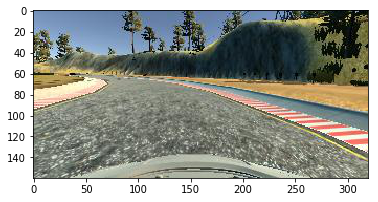

In [6]:
plt.imshow(X_train[0])

### Step 2 :  Dataset Summary & Exploration

In [7]:

# TODO: Number of training examples
n_train = len(X_train)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print()
print("Number of training examples =", n_train)


print("Image data shape =", image_shape)
print("Number of unique classes =", n_classes)




Number of training examples = 17760
Image data shape = (160, 320, 3)
Number of unique classes = 386


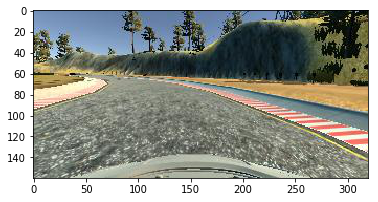

In [8]:
plt.imshow(X_train[0])

In [9]:

def show_hist(data_list):
    avg = len(data_list) / 25
    hist, bins = np.histogram(data_list, 25)
    #print(bins)
    width = 0.7 * (bins[1] - bins[0])
    center = (bins[:-1] + bins[1:]) / 2
    plt.bar(center, hist, align='center',width=width)




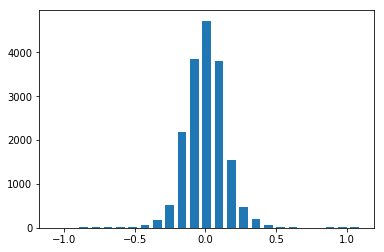

In [10]:
show_hist(y_train)

In [11]:
X_train.shape

(17760, 160, 320, 3)

In [12]:
def balance_dataset(X_train,y_train):
    avg = len(y_train) / 25
    
    features= np.array(np.zeros((1, 160, 320, 3)))
    labels = np.array([0.0])
    hist, bins = np.histogram(y_train, 25)
    print(bins)
    print(len(bins))
    for i in range(len(bins)-1):
        y_train_batch = []
        X_train_batch = []
        for j in range(len(y_train)-1):
            if(y_train[j]>= bins[i] and y_train[j]<bins[i+1]):
                y_train_batch.append(y_train[j])
                X_train_batch.append(X_train[j])
        print(len(y_train_batch))
        #features = np.concatenate((features,X_train_batch), axis=0)
        #labels = np.concatenate((labels,y_train_batch), axis= 0)
        #features.(X_train_batch)
        #labels.append(y_train_batch)
        
        
        #if(len(y_train_batch)>500):
        print("ytrain={}".format(len(y_train_batch)))
        aug_count=1000
        
     
        #print("lables size={}".format(len(labels)))
        #print("features size={}".format(len(features)))
        #print("X_aug size={}".format(len(X_aug)))
        #print("y_aug size={}".format(len(y_aug)))
        
        if(len(y_train_batch) > aug_count):
            zip_shuffled_list=list(zip(X_train_batch,y_train_batch))
            random.shuffle(zip_shuffled_list)
            X_train_shuffled, y_train_shuffled= zip(*zip_shuffled_list)
            features = np.concatenate((features,X_train_shuffled[0:aug_count]), axis=0)
            labels = np.concatenate((labels,y_train_shuffled[0:aug_count]), axis= 0)
            
        '''
        if(len(y_train_batch) < aug_count):
            #           = 1000 / 150
            aug_itr_cat = int(aug_count / len(y_train_batch))
            aug_itr_app = int(aug_count - aug_itr_cat*len(y_train_batch))
            
            for x in range(aug_itr_cat):
                features = np.concatenate((features,X_train_batch), axis=0)
                labels = np.concatenate((labels,y_train_batch), axis= 0)
            if(aug_itr_app>0):
                X_aug=[]
                y_aug=[]
                for y in range(aug_itr_app):
                    random_index=random.randint(0,len(y_train_batch)-1)
                    X_aug.append(X_train_batch[random_index])
                    y_aug.append(y_train_batch[random_index])
                features = np.concatenate((features,X_aug), axis=0)
                labels = np.concatenate((labels,y_aug), axis= 0)
        else:
            X_aug=[]
            y_aug=[]
            for k in range(aug_count):
                random_index=random.randint(0,len(y_train_batch)-1)
                X_aug.append(X_train_batch[random_index])
                y_aug.append(y_train_batch[random_index])
                
            features = np.concatenate((features,X_aug), axis=0)
            labels = np.concatenate((labels,y_aug), axis= 0)
                
       '''
    return np.array(features), np.array(labels)

In [13]:
X_train_aug1=[]
y_train_aug1=[]

#X_train_aug1,y_train_aug1=balance_dataset(X_train,y_train)
X_train_aug1=X_train
y_train_aug1=y_train

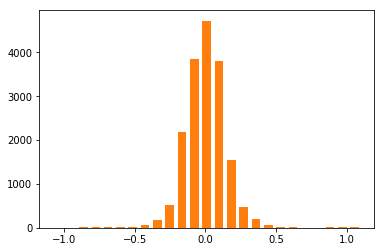

In [14]:
show_hist(y_train)
show_hist(y_train_aug1)
#print(len(y_train_aug1))

In [15]:
y_train_aug1[y_train.argmax()]
#y_train[y_train.argmin()]

1.1000000000000001

### Step 3 : Data Set Augmentation

In [16]:
def augment_data(features, labels):
    augmented_features = []
    augmented_labels = []
    
    close_to_zero_cnt=0
    for image, angle in zip(features, labels):
        if abs(angle) < 1000 :
            augmented_features.append(image)
            augmented_labels.append(angle)
        
            #Augment data set by appending fliped image
            #augmented_features.append(np.fliplr(image))
            augmented_features.append(cv2.flip(image, flipCode=1))
            augmented_labels.append(-1*angle)
            
        else:
            close_to_zero_cnt +=1
            
        
    print("close to zero : {}".format(close_to_zero_cnt))
    return np.array(augmented_features), np.array(augmented_labels)

In [17]:
X_train_aug=[]
y_train_aug=[]
X_train_aug,y_train_aug= augment_data(X_train_aug1,y_train_aug1)

close to zero : 0


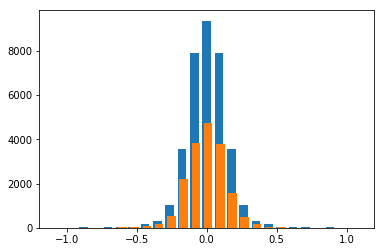

In [18]:
show_hist(y_train_aug)
show_hist(y_train_aug1)

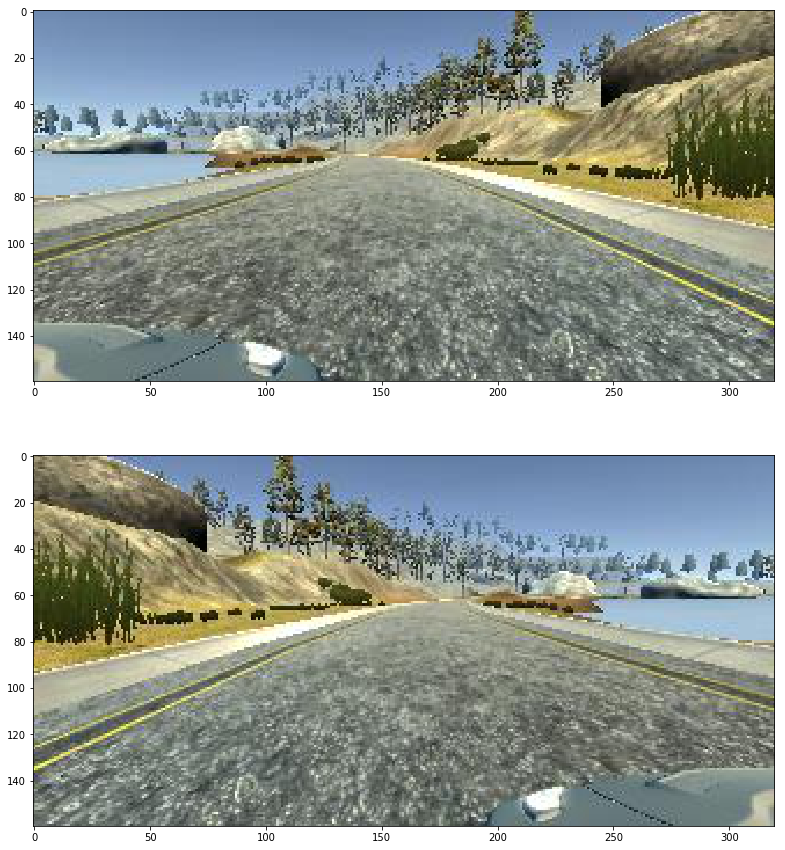

In [19]:
from PIL import Image as Image


image = Image.fromarray(X_train_aug[1000])
image.save('./images/image-original.png')


flipped = Image.fromarray(X_train_aug[1001])
flipped.save('./images/image-original.png')



#plt.imshow(flipped)
#plt.savefig('./images/image-flipped.png')

fig=plt.figure(figsize=(32, 32))

f, axarr = plt.subplots(2,1)
f.set_figheight(15)
f.set_figwidth(25)
axarr[0].imshow(image)
axarr[1].imshow(flipped)


### Step 4: Design and Test a Model Architecture

In [28]:
def nVidia_model():
  



    model = Sequential()

    #Labmbda Layer: Normalization
    model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,320,3)))
    
    # set up cropping2D layer
    
    #model.add(Cropping2D(cropping=((70,24), (0,0)))) 
    model.add(Cropping2D(cropping=((70, 24), (60, 60)))) 
   
    model.add(Conv2D(24, (5, 5), padding="same", strides=(2, 2), activation="relu"))
    #model.add(SpatialDropout2D(0.2))
    model.add(Conv2D(36, (5, 5), padding="same", strides=(2, 2), activation="relu"))
    #model.add(SpatialDropout2D(0.2))
    model.add(Conv2D(48, (5, 5), padding="valid", strides=(2, 2), activation="relu"))
    #model.add(SpatialDropout2D(0.2))
    model.add(Conv2D(64, (3, 3), padding="valid", activation="relu"))
    #model.add(SpatialDropout2D(0.2))
    model.add(Conv2D(64, (3, 3), padding="valid", activation="relu"))
    #model.add(SpatialDropout2D(0.2))

    model.add(Flatten())

    model.add(Dense(100))

    #model.add(Dropout(0.1))

    model.add(Dense(50))

    #model.add(Dropout(0.1))

    model.add(Dense(10))

    model.add(Dense(1))

    return model
    

def nVidia_model_v2():
  



    model = Sequential()

    #Labmbda Layer: Normalization
    model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(160,320,3)))
    
    # set up cropping2D layer
    
    #model.add(Cropping2D(cropping=((70,24), (0,0)))) 
    model.add(Cropping2D(cropping=((70, 24), (60, 60)))) 
   
    model.add(Conv2D(24, (5, 5), padding="same", strides=(2, 2), activation="relu"))
    model.add(SpatialDropout2D(0.2))
    model.add(Conv2D(36, (5, 5), padding="same", strides=(2, 2), activation="relu"))
    model.add(SpatialDropout2D(0.2))
    model.add(Conv2D(48, (5, 5), padding="valid", strides=(2, 2), activation="relu"))
    model.add(SpatialDropout2D(0.2))
    model.add(Conv2D(64, (3, 3), padding="valid", activation="relu"))
    model.add(SpatialDropout2D(0.2))
    model.add(Conv2D(64, (3, 3), padding="valid", activation="relu"))
    model.add(SpatialDropout2D(0.2))

    model.add(Flatten())

    model.add(Dense(100))

    model.add(Dropout(0.5))

    model.add(Dense(50))

    model.add(Dropout(0.5))

    model.add(Dense(10))

    model.add(Dense(1))

    return model
    
    


In [30]:
current_model='model.attempt-45.h5'


if os.path.isfile('./'+current_model):
    model = load_model(current_model)
    print("using saved model")
else:
    model = nVidia_model_v2()
    print("creating new model")
    
model.summary()

creating new model
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 66, 200, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 33, 100, 24)       1824      
_________________________________________________________________
spatial_dropout2d_1 (Spatial (None, 33, 100, 24)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 50, 36)        21636     
_________________________________________________________________
spatial_dropout2d_2 (Spatial (None, 17, 50, 36)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 23, 48)         43

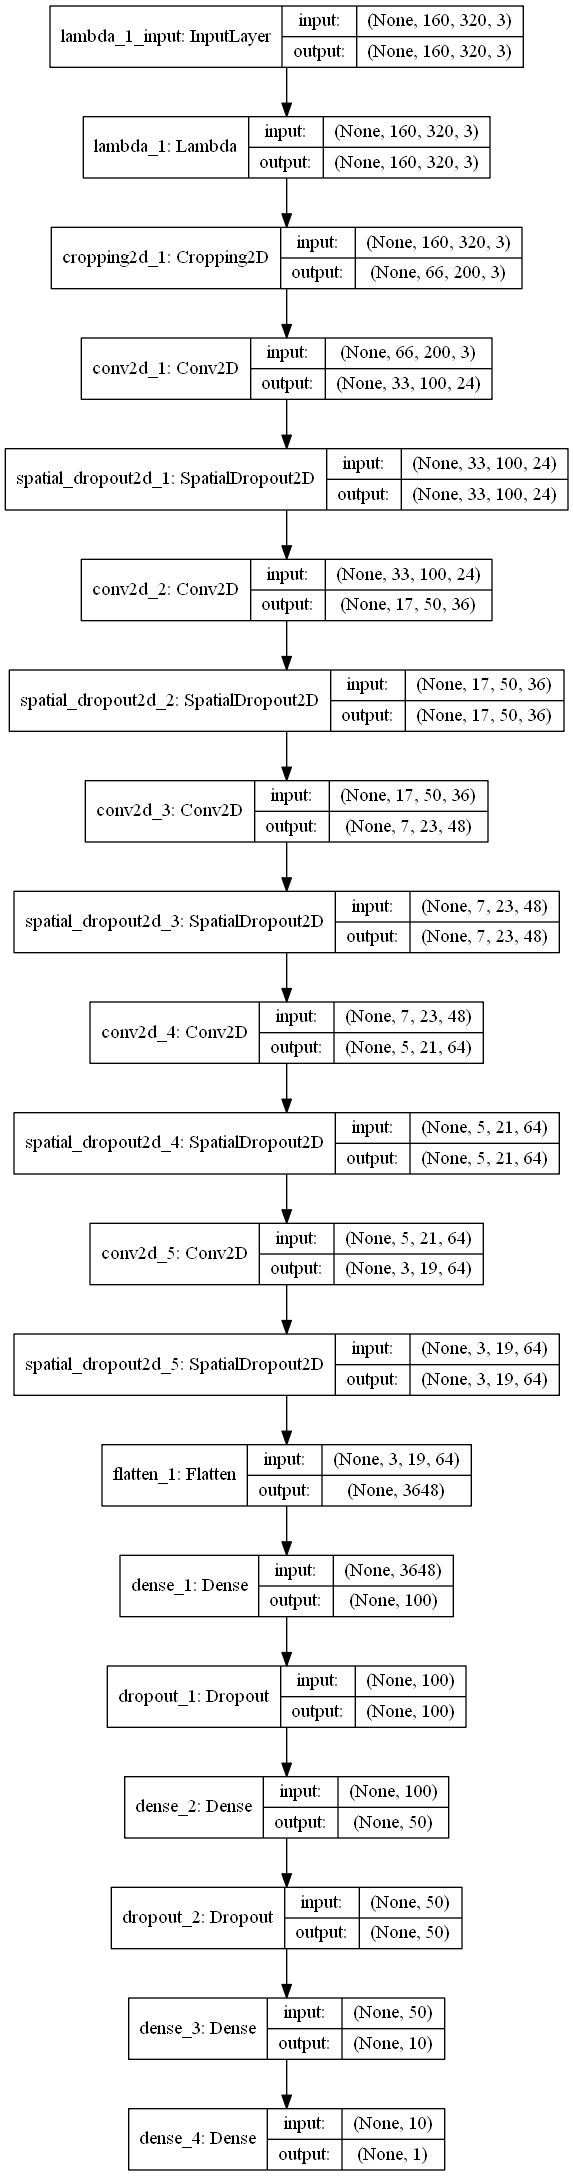

In [31]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import pydot
import graphviz
from PIL import Image as Image



from keras.utils import plot_model
model_path='./images/model-architecture.png'
plot_model(model, to_file=model_path, show_shapes=True, show_layer_names=True)




display(Image.open(model_path))

### Step 5 :  Training 

In [ ]:
BATCH_SIZE = 128
EPOCHS = 15
LEARNING_RATE = 0.0001


model.compile(optimizer=Adam(lr=LEARNING_RATE), loss='mse')
history_object=model.fit(X_train_aug, y_train_aug, batch_size=128, epochs=EPOCHS, validation_split=0.20, shuffle=True, verbose=1)


### print the keys contained in the history object
print(history_object.history.keys())

### plot the training and validation loss for each epoch
plt.plot(history_object.history['loss'])
plt.plot(history_object.history['val_loss'])
plt.title('model mean squared error loss')
plt.ylabel('mean squared error loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.show()


model.save(current_model)

Train on 28416 samples, validate on 7104 samples
Epoch 1/15
28416/28416 [==============================] - 37s 1ms/step - loss: 0.0204 - val_loss: 0.0128
Epoch 2/15
28416/28416 [==============================] - 35s 1ms/step - loss: 0.0155 - val_loss: 0.0102
Epoch 3/15
28416/28416 [==============================] - 35s 1ms/step - loss: 0.0142 - val_loss: 0.0092
Epoch 4/15
28416/28416 [==============================] - 35s 1ms/step - loss: 0.0136 - val_loss: 0.0090
Epoch 5/15
28416/28416 [==============================] - 35s 1ms/step - loss: 0.0131 - val_loss: 0.0085
Epoch 6/15
28416/28416 [==============================] - 35s 1ms/step - loss: 0.0127 - val_loss: 0.0082
Epoch 7/15
28416/28416 [==============================] - 35s 1ms/step - loss: 0.0123 - val_loss: 0.0075
Epoch 8/15
28416/28416 [==============================] - 35s 1ms/step - loss: 0.0121 - val_loss: 0.0075
Epoch 9/15
28416/28416 [==============================] - 35s 1ms/step - loss: 0.0118 - val_loss: 0.0076
Epoch 

b'2.1.4'
b'2.1.4'


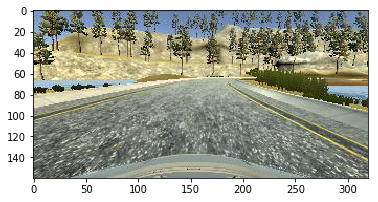

In [24]:
from keras import backend as K


f = h5py.File(current_model, mode='r')
model_version = f.attrs.get('keras_version')
keras_version = str(keras_version).encode('utf8')

print(model_version)
print(keras_version)
    
model = load_model(current_model)

input1 = model.input
outputs = [layer.output for layer in model.layers]  
functor = K.function([input1]+ [K.learning_phase()], outputs )

test_in=[]
test_in.append(X_train[9000])
layer_outs=functor([test_in,1.])


plt.imshow(X_train[9000])
plt.savefig('./images/test_input.png')


#### Normalized Image : Output from lambda layer

(160, 320, 3)


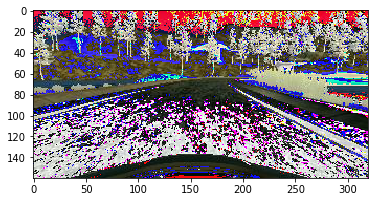

In [25]:
print(layer_outs[0][0].shape)
plt.imshow(layer_outs[0][0])
plt.savefig('./images/lambda_out.png')

#### Cropped Image : Output from Cropping2d

(66, 200, 3)


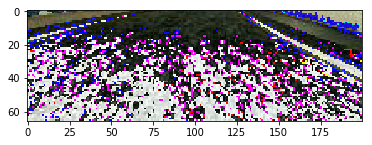

In [26]:
print(layer_outs[1][0].shape)
plt.imshow(layer_outs[1][0])
plt.savefig('./images/Cropping2d_out.png')

#### code revisions:


##### Best Working models:
    model.attempt-43.h5 : 
            *Added SpatialDropout after each conv2d layer
            *Augmented the data with recovery and curve recordings
            *Increased Epochs to 20